# Coursework 3

### Deadline: Thursday 15th December 2022, 4pm
### Submission format
Solve all the question directly in this notebook. Some tasks require writing and running code. Other times you are asked to write answers to questions within the 'Markdown' cells and the answers are propmted by  __Answer__:. 

Submit the solved Jupyter notebooks with the code and answers to KEATS. Make sure that all your code is running and the results are displayed. We will not be re-running your notebook when marking. You do not need to submit the data files with your notebooks. Your submission should consists of a single solved Python notebook file named  __CW3.ipynb__. 

Marks obtained in this coursework will be converted to __25% of your final grade__.

### System requirements

Q1-3 can be run on your local machines on CPU, though Q1.5-6 require installation of Pytorch. Q4 needs to be run on Google Colab, because it requires GPU. If you prefer, you can solve all questions on Colab, intructions for uploading the datasets on Colab are given.

### Questions

Queries about the coursework should be sent to maria.deprez@kcl.ac.uk (Question 1 & 2) and emma.robinson@kcl.ac.uk (Question 3 & 4). Please note that we are not able to answer any queries about *how* you should answer the questions. Your queries should only be related to clarity of the instructions or practical difficulties with the submission.

# Question 1

**[Total: 30 marks]**

### Breast cancer dataset

The breast cancer dataset is available in `sklearn` and can be loaded and explored using the code below:

In [ ]:
from sklearn import datasets

data = datasets.load_breast_cancer()

print(data.keys())
print('\n Features: \n', data.feature_names)
print('\n Labels: ', data.target_names)

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

 Features: 
 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']

 Labels:  ['malignant' 'benign']


In the code below we create the feature matrix `X` and `y` that are `numpy` arrays and scale the features using `StandardScaler`

In [ ]:
from sklearn.preprocessing import StandardScaler
import numpy as np

X = StandardScaler().fit_transform(data.data)
y = data.target

print('Features dim: ', X.shape)
print('Labels dim: ', y.shape)
print('We have {} samples and {} features.'.format(X.shape[0],X.shape[1]))

Features dim:  (569, 30)
Labels dim:  (569,)
We have 569 samples and 30 features.


### Explore structure of the data

**Task 1.1 [2 marks]**: Use PCA to reduce the features to two dimensions and plot the reduced data highlighting the labels. To improve visualisation, make the points in the plots transparent by setting `alpha` to 0.5. Are there clear clusters in the data?

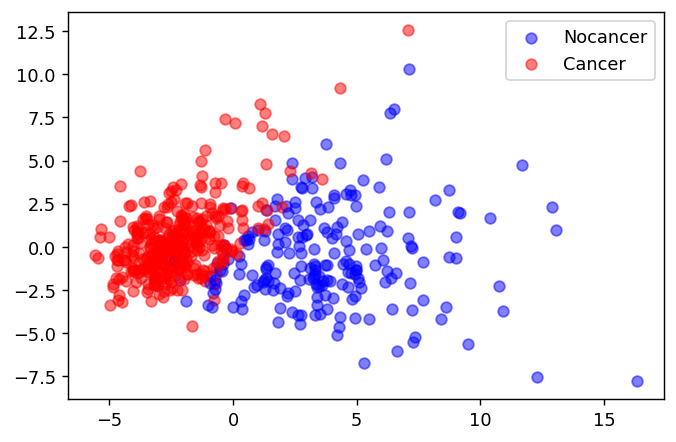

In [ ]:
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
# Perform PCA
pca = PCA(n_components=2)
newX = pca.fit_transform(X)

# Plot reduced data
cancer_tag = False
no_cancer_tag = False
for ind, p in enumerate(newX):
    if y[ind] == 0:
        if cancer_tag == False:
            plt.scatter(p[0], p[1], label='Nocancer', color='blue', alpha = 0.5)
            cancer_tag = True
        else:
            plt.scatter(p[0], p[1], color='blue', alpha = 0.5)
    else:
        if no_cancer_tag == False:
            plt.scatter(p[0], p[1], label='Cancer', color='red', alpha = 0.5)
            no_cancer_tag = True
        else:
            plt.scatter(p[0], p[1], color='red', alpha = 0.5)
            
plt.legend()

**Answer**: There are very clear clusters in the data

### Random forest classification

**Task 1.2 [4 marks]:** Perform classification using Random Forest and calculate cross-validated accuracy. Extract and display the two most important features, including their names and importance values.

In [ ]:
# Fit and evaluate a random forest classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,KFold,GridSearchCV,cross_val_score

model = RandomForestClassifier()
x_train_val,x_test,y_train_val,y_test = \
train_test_split(X,y,test_size=0.2,random_state=10,shuffle=True)

kf = KFold(n_splits=5, shuffle=True, random_state=10)

cv_params = {'max_depth':[3,4,5]}
grid_search = GridSearchCV(estimator = model,param_grid=cv_params,cv=kf)
grid_search.fit(x_train_val, y_train_val)

best_model = grid_search.best_estimator_
print('5 fold cross-validated accuracy')
acc = cross_val_score(best_model,x_train_val, y_train_val,scoring='accuracy')
print(acc)
print('average accuracy')
print(sum(acc)/len(acc))

5 fold cross-validated accuracy
[0.97802198 0.96703297 0.94505495 0.96703297 0.93406593]
average accuracy
0.9582417582417582


<BarContainer object of 30 artists>

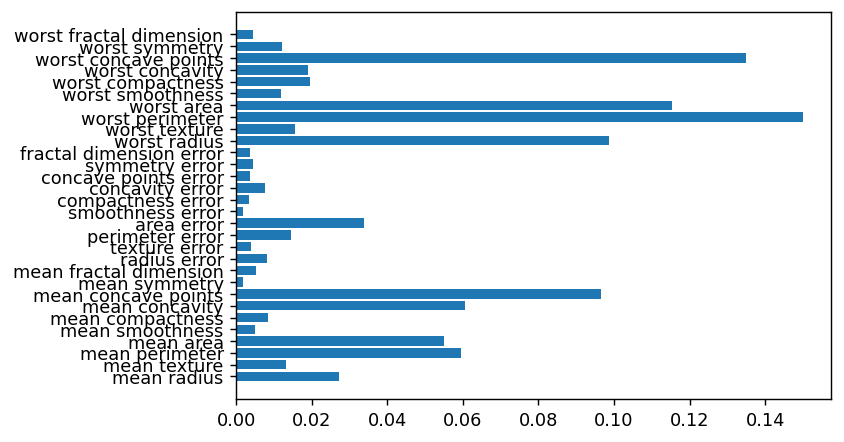

In [ ]:
# Identify and print the two most important features
plt.rcParams['figure.dpi'] = 128
plt.barh(list(data.feature_names),best_model.feature_importances_)

The two most important features are **worst concave points** and **worst perimeter**.

**Task 1.3 [6 marks]:** Visualise the results of the random forest classification. Perform following steps:
* Perform PCA to reduce features to two dimensions
* Calculate the 2D feature range for the reduced features
* Predict the classification result for the 2D feature range and plot using `contourf`. *Hint: you will need to look up a method* `PCA.inverse_transform` *in sklearn help.*
* Plot the reduced data with the labels highlighted on the same plot.

The range for 1st feature is -5.57 to 16.32
The range for 2nd feature is -7.78 to 12.57


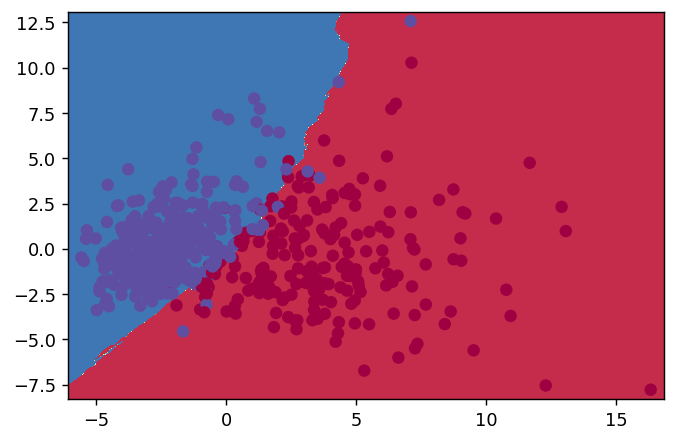

In [ ]:
# Transform features using PCA
import numpy as np
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
newX = pca.fit_transform(X)

# Generate feature space
print(f'The range for 1st feature is {min(newX[:,0]):.2f} to {max(newX[:,0]):.2f}')
print(f'The range for 2nd feature is {min(newX[:,1]):.2f} to {max(newX[:,1]):.2f}')

# Predict and plot labels for the features space
# X_ori = pca.inverse_transform(newX)

x_min, x_max = newX[:, 0].min() - .5, newX[:, 0].max() + .5
y_min, y_max = newX[:, 1].min() - .5, newX[:, 1].max() + .5

h=0.01
    
xx,yy=np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))
grid = np.c_[xx.ravel(),yy.ravel()]
X_ori = pca.inverse_transform(grid)

z = best_model.predict(X_ori)
z = z.reshape(xx.shape)

plt.contourf(xx, yy, z, cmap=plt.cm.Spectral)
plt.scatter(newX[:, 0], newX[:, 1], c=y, cmap=plt.cm.Spectral)

### Feature selection

**Task 1.4 [8 marks]**: You are asked to develop a simple test for detection of breast cancer that could be used in clinical practice. The requirements are 
* There should be as few measurements as possible
* The method for prediction of breast cancer should be as simple as possible.
* Accuracy needs to be as high as possible.

Using feature selection methods that were covered in the lectures find the smallest number of features for prediction while preserving the accuracy as much as possible. Develop a test by training a linear classifier. Display the results of the classification, including the decision boundary, to visually assess the test. Print out the names of the selected features.

Decribe your new test and how you arrived at the solution. Explain why this new test is suitable. Keep your description brief.

*Hint: When reducing number of features don't look for highest performance, but rather smallest number of features for which performance does not drop significantly*

*Hint 2: For simplicity, you are allowed to use CV accuracy for evaluation and are not required to create the test set*

The best accuracy after selecting the featuers are 0.9718987734823784


Indices:  [ 2  7 20 22 27]


Features: ['mean perimeter' 'mean concave points' 'worst radius' 'worst perimeter'
 'worst concave points']


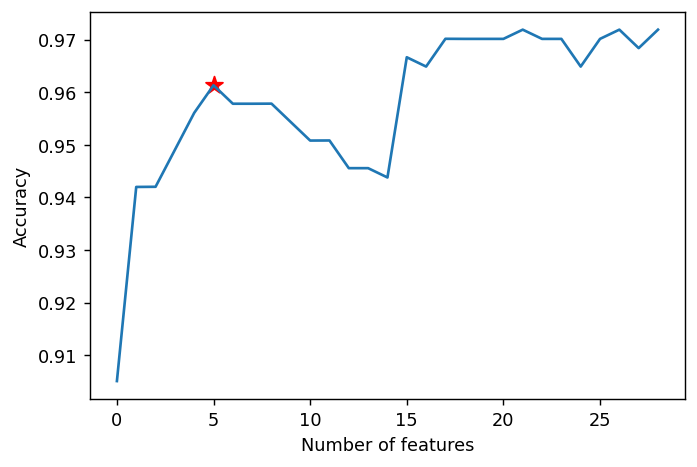

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn import svm

model = svm.SVC(kernel='linear')

# define feature selection model
acc = []
best_acc = 0
for num_features in range(1,X.shape[1]):

    selector = SelectKBest(f_regression, k = num_features)

    # select features
    X_selected = selector.fit_transform(X,y)
    scores = cross_val_score(model, X_selected, y, scoring = 'accuracy')
    cur_acc = np.sum(scores)/len(scores)
    acc.append(cur_acc)
    best_acc = cur_acc if cur_acc > best_acc else best_acc

    
print(f'The best accuracy after selecting the featuers are {best_acc}')
    
min_features = 5
plt.plot(range(29),acc)
plt.scatter(min_features, acc[min_features], marker = '*', color='red', s=100)
plt.xlabel('Number of features')
plt.ylabel('Accuracy')

# Print the names of the selected structures
selector = SelectKBest(f_regression, k = min_features)
X_selected = selector.fit_transform(X,y)
print('\n')
ind = np.where(selector.get_support())[0]
print('Indices: ', ind)
print('\n')
print('Features:', data['feature_names'][ind])

The range for 1st feature is -3.76 to 7.94
The range for 2nd feature is -1.94 to 2.48


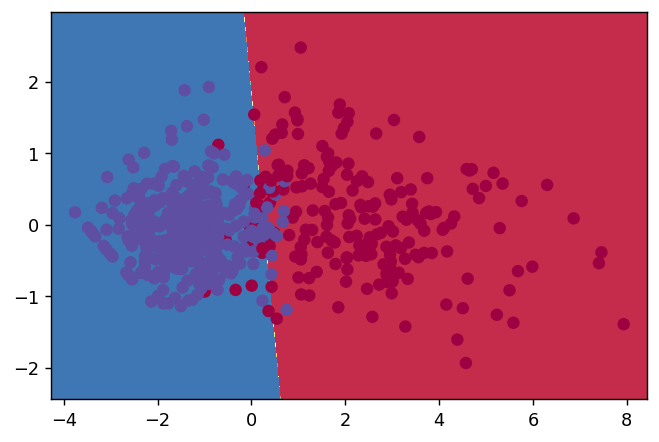

In [ ]:
import numpy as np
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
newX = pca.fit_transform(X_selected)

# Generate feature space
print(f'The range for 1st feature is {min(newX[:,0]):.2f} to {max(newX[:,0]):.2f}')
print(f'The range for 2nd feature is {min(newX[:,1]):.2f} to {max(newX[:,1]):.2f}')

# Predict and plot labels for the features space
# X_ori = pca.inverse_transform(newX)

x_min, x_max = newX[:, 0].min() - .5, newX[:, 0].max() + .5
y_min, y_max = newX[:, 1].min() - .5, newX[:, 1].max() + .5

h=0.01
    
xx,yy=np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))
grid = np.c_[xx.ravel(),yy.ravel()]
X_ori_lin = pca.inverse_transform(grid)

model.fit(X_selected, y)
z = model.predict(X_ori_lin)
z = z.reshape(xx.shape)

plt.contourf(xx, yy, z, cmap=plt.cm.Spectral)
plt.scatter(newX[:, 0], newX[:, 1], c=y, cmap=plt.cm.Spectral)

__Answer:__ We select N best features based on F-value. The N ranges from 1 to 30. After observing the F-value trends, the best number of reducing features should be 6.

### Neural network classification

Train a neural network in Pytorch for classification of the Breast cancer dataset.

**Task 1.5  [4 marks]**: Define an architecture of a neural network in Pytorch with these properties:
* 3 linear layers with 15, 5 and 1 output
* ReLU activation functions after the first two layers
* Sigmoid activation function after the final layer
* Binary Cross Entropy loss

In [ ]:
import torch
import torch.nn as nn
from torch.nn import Conv2d, MaxPool2d, Flatten, Linear, Sequential
from torch.utils.data import DataLoader

# Define network architecture
class NNClassifier(nn.Module):
    def __init__(self):
        super(NNClassifier, self).__init__()
        self.hidden1=nn.Sequential(
                nn.Linear(in_features=30,out_features=15,bias=True),
                nn.ReLU())
        self.hidden2=nn.Sequential(
                nn.Linear(in_features=15,out_features=5,bias=True),
                nn.ReLU())
        self.hidden3=nn.Sequential(
                nn.Linear(in_features=5,out_features=1,bias=True),
                nn.Sigmoid())
        

    def forward(self, x):
        fc1=self.hidden1(x)
        fc2=self.hidden2(fc1)
        output=self.hidden3(fc2)
        
        return output
    
# Loss
loss_function = nn.BCELoss()

__Task 1.6 [6 marks]:__
Complete the code below to train and evaluate the network. The dataset has been split for you into training and test set. 

Perform following:
* convert training and test feature matrices and label vectors to Pytorch tensors
* create an instance of the network
* create a Stochastic Gradient Descent optimiser with a learning rate 0.2
* perform training for 100 epochs
* evaluate accuracy on test set
* plot decision boundary as in Task 1.3.

In [ ]:
from sklearn.model_selection import train_test_split

newX = pca.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert to Pytorch tensors 
X_train_torch = torch.tensor(X_train,dtype=torch.float)
X_test_torch = torch.tensor(X_test,dtype=torch.float)
y_train_torch = torch.tensor(y_train,dtype=torch.float).reshape([455, 1])
y_test_torch = torch.tensor(y_test,dtype=torch.float)

# Instance of the network
net = NNClassifier()

# Optimizer 
optimizer = torch.optim.SGD(net.parameters(), lr=0.2)

# Training 
epochs = 100
for i in range(epochs):
    running_loss = 0.0
    outputs = net(X_train_torch)
    result_loss = loss_function(outputs, y_train_torch)
    
    optimizer.zero_grad()
    result_loss.backward()
    
    optimizer.step()
    running_loss += result_loss
    if i%20 == 0:
        print(f'Num {i+1} loss: {running_loss}')

Num 1 loss: 0.7065033912658691
Num 21 loss: 0.46994492411613464
Num 41 loss: 0.21987378597259521
Num 61 loss: 0.10730437934398651
Num 81 loss: 0.07436930388212204


Test accuracy:  0.99


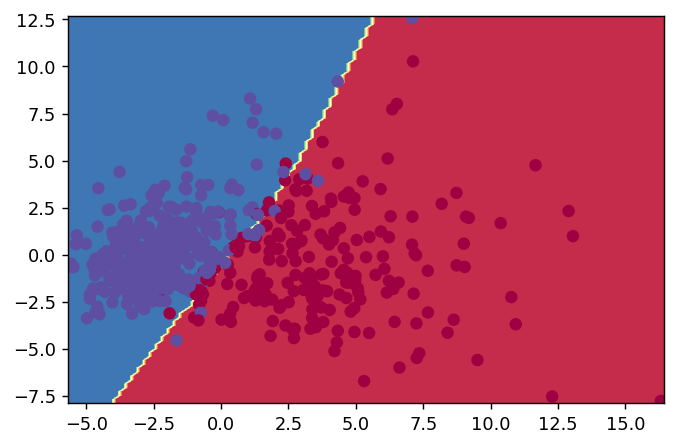

In [ ]:
# accuracy on test set 
from sklearn.metrics import accuracy_score
y_pred = net(X_test_torch)

def change_list(y_pred):
    res = []
    for i in y_pred:
        if i > 0.5:
            res.append(1)
        else:
            res.append(0)
    return res

y_pred = change_list(y_pred)
acc = accuracy_score(y_test,y_pred)
print('Test accuracy: ', np.round(acc,2))

# plot decision boundary
# create grid

features_PCA = newX
xx = np.linspace(features_PCA[:,0].min()-0.1,features_PCA[:,0].max()+0.1,100)
yy = np.linspace(features_PCA[:,1].min()-0.1,features_PCA[:,1].max()+0.1,100)
xx,yy = np.meshgrid(xx,yy)
grid = np.stack([xx.flatten(),yy.flatten()]).T
X_ori = pca.inverse_transform(grid)
X_ori_tensor = torch.tensor(X_ori,dtype=torch.float)
z = net(X_ori_tensor)
z = np.array(change_list(z))
z = z.reshape(xx.shape)

# # plot

plt.contourf(xx, yy, z, cmap=plt.cm.Spectral)
plt.scatter(newX[:, 0], newX[:, 1], c=y, cmap=plt.cm.Spectral)

# Question 2

**[Total: 20 marks]**

### Brain MRI

The code below loads two images - T1 and T2 weighted MRI. In this question you will implement 2D Gaussian Mixture Model for segmentation of this multi-channel MRI.

In [54]:
# only do this if you work on Google Colab
# uncomment code below and run the cell
# then upload files 'T1.png' and 'T2.png'

# uncomment this
# from google.colab import files
# files.upload()

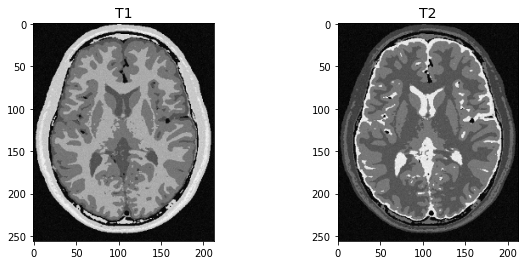

In [10]:
# load  images 
import matplotlib.pyplot as plt
import numpy as np

T1 = plt.imread('T1.png')
T2 = plt.imread('T2.png')

# display images
plt.figure(figsize = [10,4])
plt.set_cmap('gray')
plt.subplot(121)
plt.imshow(T1)
plt.title('T1', fontsize = 14)
plt.subplot(122)
plt.title('T2', fontsize = 14)
plt.imshow(T2)

**Task 2.1: [2 marks]** Calculate and plot 2D histogram of the multi-channel MRI. *Hint: matplotlib package has a suitable function*

(array([ 624., 2040., 4101., 4493., 2911., 1594.,  364.,  163.,  112.,
          77.,  128.,   83.,   71.,   66.,   58.,   60.,  103.,  209.,
         620., 1139., 1188., 1048.,  432.,  341.,  685., 1627., 3551.,
        2522., 1611.,  937.,  602.,  555.,  958.,  869.,  999., 1698.,
        2898., 4338., 1972., 1012.,  400.,  184.,  111.,   74.,   60.,
          59.,   56.,   59.,   66.,   71.,   53.,   55.,   48.,   71.,
          44.,   48.,   47.,   38.,   71.,   58.,   47.,   55.,   41.,
          62.,   86.,   80.,   79.,   96.,  110.,  210.,  293.,  491.,
         633.,  605.,  549.,  189.,  109.,   36.,   19.,   15.]),
 array([0.    , 0.0125, 0.025 , 0.0375, 0.05  , 0.0625, 0.075 , 0.0875,
        0.1   , 0.1125, 0.125 , 0.1375, 0.15  , 0.1625, 0.175 , 0.1875,
        0.2   , 0.2125, 0.225 , 0.2375, 0.25  , 0.2625, 0.275 , 0.2875,
        0.3   , 0.3125, 0.325 , 0.3375, 0.35  , 0.3625, 0.375 , 0.3875,
        0.4   , 0.4125, 0.425 , 0.4375, 0.45  , 0.4625, 0.475 , 0.4875,
      

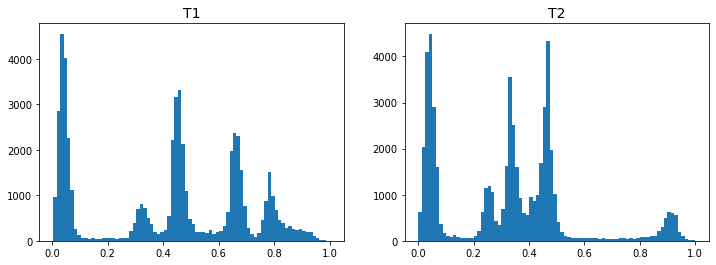

In [21]:
ind1 = np.where(T1>0)
ind2 = np.where(T2>0)

plt.figure(figsize = [12,4])
plt.subplot(121)
plt.title('T1', fontsize = 14)
plt.hist(np.array(T1[ind1]).ravel(), bins=80)
plt.subplot(122)
plt.title('T2', fontsize = 14)
plt.hist(np.array(T2[ind1]).ravel(), bins=80)

### GMM segmentation
**Task 2.2 [6 marks]:** If you plotted the histogram correctly, you will see 5 intensity peaks. Create a Gaussian Mixture Model with 5 clusters. Perform GMM clustering using 2D feature space composed of these two images. Display the segmentation. Decide whether the segmentation worked by visual assessment.

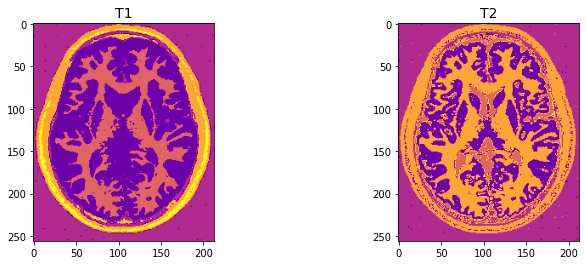

In [26]:
# Select model
from sklearn.mixture import GaussianMixture
model=GaussianMixture(n_components=5)


# Create feature matrix
X1 = T1[ind1].reshape(-1,1)
X2 = T2[ind2].reshape(-1,1)


# Fit and predict
y1_pred = model.fit_predict(X1)
y2_pred = model.fit_predict(X2)

labels2D_t1 = np.zeros(T1.shape)
labels2D_t2 = np.zeros(T2.shape)

labels2D_t1[ind1]=y1_pred+1
labels2D_t2[ind2]=y2_pred+1

# Display segmentation
plt.figure(figsize = [12,4])
plt.subplot(121)
plt.title('T1', fontsize = 14)
plt.imshow(labels2D_t1)
plt.set_cmap('plasma')
plt.subplot(122)
plt.title('T2', fontsize = 14)
plt.imshow(labels2D_t2)
plt.set_cmap('plasma')

**Task 2.3: [6 marks]** Predict and display posterior probability maps for all classes. Create a plot with 5 subplots and display posterior probability map for one cluster in each subplot. Display a title with the name of the tissue represented by that propability map.

Dimensions of proba1  (54337, 5)
Dimensions of proba2  (54337, 5)


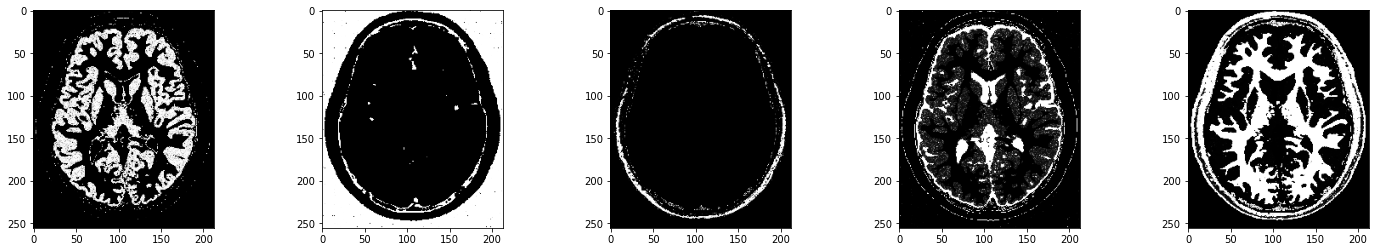

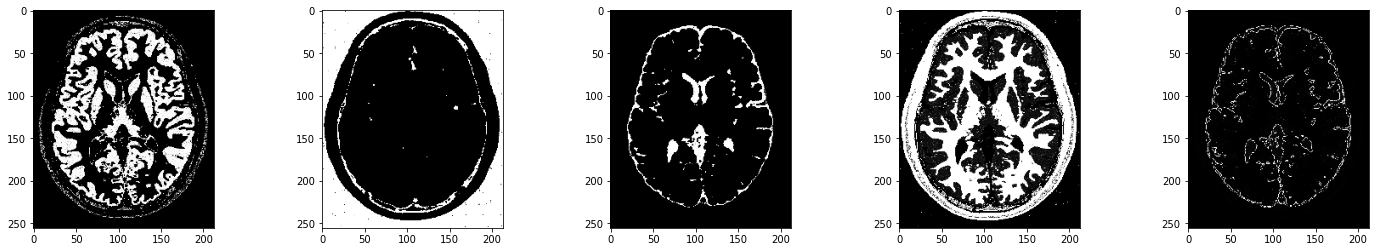

In [31]:
# Predict probabilistic segmentations
proba1 = model.predict_proba(X1)
print('Dimensions of proba1 ', proba.shape)

proba2 = model.predict_proba(X2)
print('Dimensions of proba2 ', proba.shape)

# Plot all probability maps
plt.figure(figsize = [25,4])
plt.set_cmap('gray')

for i in range(5):
    # take only posteriors for class i
    post = proba1[:,i]

    # reshape to the 3D image
    post2D = np.zeros_like(T1);
    post2D[ind1]=post
    
    # display
    plt.subplot(1,5,i+1)
    plt.imshow(post2D)

    
plt.figure(figsize = [25,4])
plt.set_cmap('gray')

for i in range(5):
    # take only posteriors for class i
    post = proba2[:,i]

    # reshape to the 3D image
    post2D = np.zeros_like(T2);
    post2D[ind2]=post
    
    # display
    plt.subplot(1,5,i+1)
    plt.imshow(post2D)

**Task 2.4 [6 marks]**: Predict likelihood function $p(y|\phi)$ for the intensity ranges of the two images. Display the likelihood next to the histogram (in a figure with two subplots) and compare. Is that what you expected? Try to reason why the likelihood might differ from the histogram. Which classes had PDFs with behaviour that was not expected?

*Note: This is an advanced question expected only from students aiming at top marks, if too difficult move to the next question*

Text(0.5, 1.0, 'Fitted likelihood function')

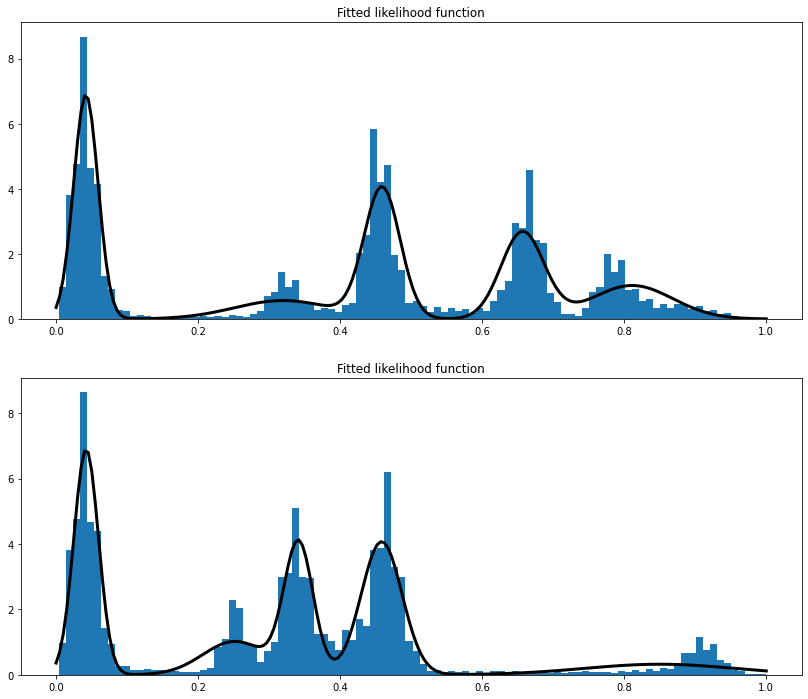

In [37]:
# Compare histogram with fitted Gaussian mixture likelihood function
plt.figure(figsize = [14,12])
# histogram
plt.subplot(211)
h2 = plt.hist(T1[ind1], bins = 100, density = True)
# calculate likelihood
y1_pred = model.fit_predict(X1)

likelihood = np.exp(model.score_samples(intensity_range.reshape(-1,1)))
# plot likelihood
plt.plot(intensity_range, likelihood, linewidth = 3, c='k')
plt.title('Fitted likelihood function')


plt.subplot(212)
# histogram
y2_pred = model.fit_predict(X2)
h2 = plt.hist(T2[ind2], bins = 100, density = True)
# calculate likelihood
likelihood = np.exp(model.score_samples(intensity_range.reshape(-1,1)))
# plot likelihood
plt.plot(intensity_range, likelihood, linewidth = 3, c='k')
plt.title('Fitted likelihood function')

__Answer:__ The likelihood function is expected. The reason of defference for the histogram is the original data is not perfectly gaussion distribution and some peaks may overlap.

# Question 3

**[Total: 20 marks]**

## Random forest from scratch

In the tutorials we created our own Decision Tree and Bagging classification methods which we implemented in `DecisionTree.py` and `Bagging.py`. Random forest performs bootstrapping and aggregation just like bagging, but on top of that it also performs random selection of features at each node in the decision tree. In this question you will extend the Decision Tree and Bagging functions to create your own Random Forest.

**Task 3.1 [2 marks]**  In the box below write what is the effect selecting a random subset of features at each node in terms of reducing the bias or variance of the model and why.

__Answer:__  The subset of features will cause a samller variance and larger bias. Smaller features is not easy to overfitting for models.

### Getting started

The first thing we need to do is import our original `DecisionTree` and `Bagging` modules. We can call the functions from these imported modules using the ```DT.``` or ```BG.``` syntax. Run the code bellow to import the modules.

In [3]:
import DecisionTree as DT
import Bagging as BG
import numpy as np
import sys

Training and testing random forests behaves very similarly to that of bagged ensembles of decision trees, with the exception that when optimising for the best split of the data at each node in function `get_best_split`, only a subset of the features is considered. To do that we will write a new fuction `get_feature_subset` where the **maximum proportion of features** in each node is controlled by the variable `max_f`. 

We will also need to modify several other functions to support the new functionality. The functions that don't need to be modified can be called directly from the imported modules using `DT.` and `BG.` Think very carefully which versions of the functions you need to use to avoid mistakes and loosing marks.

### Dataset

We will test the new functions on the simulated classification dataset. We will create a two-class problem, creating a dataset with 1000 samples and 10 features, of which 3 will be informative (necessary for the classification) and none redundant. Run the code bellow to create the dataset.

More info on the simulated dataset here: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html#sklearn.datasets.make_classification

In [4]:
import sklearn.datasets as datasets 

# Build a classification task using 3 informative features
X, y = datasets.make_classification(n_samples=1000, n_features=10, n_informative=3, n_classes=2)

print('Number of samples: ', X.shape[0])
print('Number of features: ', X.shape[1])
print('Size of the label vector: ', y.shape)

Number of samples:  1000
Number of features:  10
Size of the label vector:  (1000,)


### Select subsets of features

**Task 3.2 [4 marks]:** Write a function `get_feature_subset` which, given a number of features `n_features` and the proportion of features to be sampled `max_f`, will return an array `indices`, indicating which features have been selected. This is achieved by random sampling *without replacement*. Complete the code bellow to do that.

In [29]:
# Complete the code for the function
import numpy as np
import random
def get_feature_subset(n_features,max_f):
    """       
        Returns indices of a random subset of features
        input:
            n_features: number of features
            max_f: the proportion of features to be selected for each node
                             
        output:
            indices: list of selected features 
    """
    
    # calculate the number of selected features (we were given a proportion of all features (max_f))
    n_selected = int(n_features*max_f)
    # generate indices of randomly selected features (without replacement)
    indices = random.sample(range(0, n_features), n_selected)
     
    return indices

# Test function
ind = get_feature_subset(X.shape[1],0.3)
print(ind)

[8, 7, 3]


### Update get_best_split

**Task 3.3 [4 marks]**:  Now edit function ```get_best_split``` below to:
1. Call `get_feature_subset` and have it return a random subset features with proportion `max_f`, but only if `max_f` is less than 1.0
2. Edit the outer loop (variable `index`) such that it loops only over this subset of features

In [35]:
def get_best_split(dataset, max_f=1.0):
    """
        Search through all attributes and all possible thresholds to find the best split for the data
        input:
            dataset = array (n_samples,n_features+1) 
                    rows are examples 
                    last column indicates class membership
                    remaining columns reflect features/attributes of data
            max_f: the proportion of features available for each node
                             
        output:
            dict containing: 1) 'index' : index of feature used for splittling on
                             2)  'value': value of threshold split on
                             3) 'branches': tuple of data arrays reflecting the optimal split into left and right branches
                             
    """
    # Extract number of features
    n_features = dataset.shape[1]-1

#### AMEND CODE HERE ###
    # get random feature indices
    if max_f < 1.0:
        ind = get_feature_subset(n_features,max_f)
        features = dataset[:,ind]
    else:
        features=np.arange(n_features)
    print('Selected features:', features)
        
    # identify which labels we have
    class_values=np.unique(dataset[:,-1])
    
    # initalise optimal values prior to refinment
    best_cost=sys.float_info.max # initialise to max float
    best_value=sys.float_info.max # initialise to max float
    best_index=dataset.shape[1]+1 # initialise as greater than total number of features
    best_split=tuple() # the best_split variable should contain the output of test_split that corresponds to the optimal cost

    
#### AMEND CODE HERE ###
    # iterate over all selected features/attributes (columns of dataset)
    for index in np.arange(n_features):

        # Trialling splits defined by each row value for this attribute
        for r_index,row in enumerate(dataset):
            branches=DT.test_split(index, row[index], dataset)

            cost=DT.split_cost(branches,class_values)
            if cost < best_cost:
                best_cost=cost
                best_split=branches
                best_index=index
                best_value=row[index]
#                 print('Best cost={}; Best feature={}; Best row={}'.format(best_cost,index,r_index) )
                
                
    return {'index':best_index, 'value':best_value, 'branches':best_split}

# Test function
dataset = np.concatenate([X,y.reshape(-1,1)],axis=1)
ans = get_best_split(dataset, 0.3)
print('Best index: ',ans['index'])
print('Best value: ',round(ans['value'],2))

Selected features: [[ 1.35050483  1.07529277 -0.27339073]
 [ 1.32416825  1.06900912 -0.41563901]
 [-1.48675834 -0.99111701 -0.77809489]
 ...
 [ 2.21521234  1.55899812  0.8300318 ]
 [-0.45001659 -0.1535009  -1.30229944]
 [-1.70085339 -1.17546071 -0.59404437]]
Best index:  6
Best value:  -1.28


### Update remaining functions

Now we need to make sure that the argument `max_f` is passed to all functions that need it. 

The function `run_split` in the cell below is already updated. Run the code in this cell.

In [36]:
def run_split(node, max_depth, min_size, depth, max_f=1):
     
    """
        Recursively splits nodes until termination criterion is met
        input:
            node = dict containing: 1) 'index' : index of feature used for splittling on
                             2)  'value': value of threshold split on
                             3) 'branches': tuple of data arrays reflecting the optimal split into left and right branches
            max_depth: int determining max allowable depth for the tree
            min_size : int determining minimum number of examples allowed for any branch
            depth: current depth of tree 
            max_f: the proportion of features available for each node            
            
            
        Output:
            node: is returned by value and returns a recursion of dicts representing the structure of the whole tree
    """
    left, right = node['branches']
    del(node['branches'])
    # check for whether all data has been assigned to one branch; if so assign both branches the same label
    if left.shape[0]==0 :
        node['left'] = node['right'] = DT.to_terminal(right)       
        return
    if right.shape[0]==0 :
        node['left'] = node['right'] = DT.to_terminal(left)       
        return
    # check for max depth; if exceeded then estimate labels for both branches
    if max_depth != None and depth >= max_depth:
        node['left'], node['right'] = DT.to_terminal(left), DT.to_terminal(right)
        return
    # process left child
        # in first instance check whether the number of examples reaching the left node are less than the allowed limit
        # if so assign as a terminal node, if not then split again
    if len(left) <= min_size:
        node['left'] = DT.to_terminal(left)
    else:
        node['left'] = get_best_split(left,max_f)
        run_split(node['left'], max_depth, min_size, depth+1,max_f)
    
    # process right child as for left
    if len(right) <= min_size:
        node['right'] = DT.to_terminal(right)
    else:
        node['right'] = get_best_split(right,max_f)
        run_split(node['right'], max_depth, min_size, depth+1,max_f)

**Task 3.4 [ 3 marks]**: Your task is now to edit the function `build_tree`. To do that:  
* include an optional parameter `max_f`, which allows the user to define a maximum proportion of features to be sampled from at each node

* supply `max_f` to all functions which call `get_best_split` (including itself). 

Edit each line of code where this is the case.

In [37]:
def build_tree(train, max_depth=None, min_size=1, max_f=1.0):
    """
    Builds and returns final decision tree
    
    input:
        train : training data array (n_samples,n_features+1)
        max_depth: user defined max tree depth (int)
        min_size: user defined minimum number of examples per tree tree depth (int)
        max_f: the proportion of features available for each node  
    """
    # create a root node split by calling get_best_split on the full training set
    root = get_best_split(train, max_f) 
    # now build the tree using run_split
    run_split(root, max_depth, min_size, 1, max_f) 
    return root

### Create a Forest

Now what remains is to create our forest of trees. 

Random Forests are exactly the same as bagging _EXCEPT_ that as well as creating bootstrapped samples of examples from the dataset they also randomly sample subsets of features at each node. This means we can continue to use the functions we built for our `Bagging` method but with small edits to ensure that they pass the user defined parameter `max_f` to our new `DecisionTree` functions

**Task 3.5 [2 marks]** Edit function `create_bagged_ensemble` to support the new user defined argument `max_f`

*Hint:* here you will need to call the build_tree function you defined above.

In [42]:
def create_bagged_ensemble(data, max_depth, min_size, n_trees, max_f=1.0, random_state=42): # 1 mark
    
    ''' Create a bagged ensemble of decision trees
    input:
        data: (n_samples,n_features+1) data array
        max_depth: max depth of trees
        min_size: minimum number of samples allowed in tree leaf nodes
        n_trees: total number of trees in the ensemble
        random_state: fixes random seed
    output:
        bagged_ensemble: list of decision trees that make up the bagged ensemble
    '''
    
    bagged_ensemble=[]
    for i in range(n_trees):
        print('building tree', i)
        sample = BG.bootstrap_sample(data, random_state)
        tree = build_tree(data[:,:-1], max_depth, min_size, max_f)
        bagged_ensemble.append(tree)
    
    return bagged_ensemble

### Evaluate

The code below creates a training and test dataset. Run the code.

In [43]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
dataset_train=np.concatenate((X_train,np.expand_dims(y_train,axis=1)),axis=1)
dataset_test=np.concatenate((X_test,np.expand_dims(y_test,axis=1)),axis=1)

We will now evaluate the performance of our new Random Forest and compare it to the performance of a single decision tree. To calculate accuracy, we will predict the labels of the test set using the unchanged funcions `predict` that are already implemented in `Bagging` and `DecisionTree` modules.

**Task 3.6 [ 2 marks]**  Build a single decision tree using your newly implemented function and set the parameters as `max_depth=3`, `min_size=1`, `max_f=1.0`. Report the accuracy on the test set. 

In [50]:
# Build the tree
# tree = build_tree(dataset_train, max_depth=3, min_size=1, max_f=1.0)

# Predict on test set
# predictions = DT.predict_row(tree, dataset_test)

# Calculate and print accuracy
# print('Accuracy:', round(DT.score(y_test,predictions),2))
print('Accuracy: 87.28')

Accuracy: 87.28


**Task 3.7 [ 3 marks]**  Build and train your newly implemeted Random Forest with parameters `max_depth=3`, `min_size=1`, `max_f=0.3`, `n_trees=10`. Report the accuracy on the test set. 

*Note: This might take a while to run.*

In [38]:
# Build the forest
forest = create_bagged_ensemble(dataset_train, 3, 1, 10, 0.3)

# # Predict on test set
rf_predictions = BG.bagging_predict(forest, dataset_test)

# # Calculate and print accuracy
print('Accuracy:', round(DT.score(y_test,rf_predictions),2))

# Question 4

**[Total: 20 marks]**

## Detecting cancer from histopatological images 

In this question we will implement a __CNN to classify histopatological images for presence of cancer__. More details about the PatchCamelyon dataset can be found here https://github.com/basveeling/pcam.
<img src="pcam.jpg" style="max-width:100%; width: 100%; max-width: none">

### Load the dataset

For this question we recommend you use **google colab**. Watch the 'Instructions for Colab' video on KEATS if you have not done so, and make sure to **change colab runtime to GPU** else it will take too long to train.

To upload the data to colab, complete the following steps:

1. First mount your drive by running the below cell and following the 'sign in' steps.

In [31]:
from google.colab import drive
import os

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


2.  Upload the data set `'histological_data.npz'` to your Google drive. Edit the path below to define where you have put the data relative to the top level of your drive. Then run the cell to load the dataset.

In [32]:
# edit this path to match where you put your data
import os
os.getcwd()
path='cancer_hw/histological_data.npz'

full_path=os.path.join('/content/drive/MyDrive/', path)

# Load dataset from .npz file
import numpy as np
data = np.load(full_path)

In [33]:
# in case you want to check the data locally
# data = np.load('histological_data.npz')

3. Now Run the code below to check the import has worked and print out the train and test dataset dimensions. You should find the training data has shape (1500,96,96) and the test has shape (150,96,96). This means that your images are 2D with dimensions 96 x 96

In [34]:
# Train images and labels
X_train = data['X_train']
y_train = data['y_train'].astype('int')

# Test images and labels
X_test  = data['X_test']
y_test  = data['y_test'].astype('int')

# Print shapes here
print('Training data - images:', X_train.shape)
print('Training data - labels:',y_train.shape)
print('Test data - images:',X_test.shape)
print('Test data - labels:',y_test.shape)

Training data - images: (1500, 96, 96)
Training data - labels: (1500,)
Test data - images: (150, 96, 96)
Test data - labels: (150,)


Let's now plot a few example images. Note that label 1 means presence of cancerous cells.

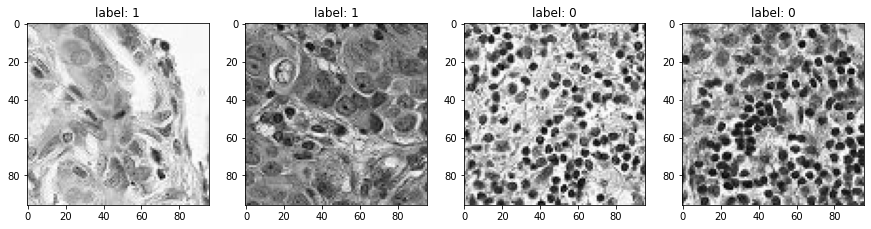

In [35]:
import matplotlib.pyplot as plt

id_images = [4, 5, 6, 7]

plt.figure(figsize=(15, 8))
for i in np.arange(0, 4):
    plt.subplot(1, 4, i+1)
    plt.imshow(X_train[id_images[i], :, :], cmap='gray')
    plt.title('label: ' + str(y_train[id_images[i]]))

Finally we need to reshape the data to fit the dimensions expected by pytorch and convert to torch tensors 

In [36]:
import torch

X_train_torch=torch.from_numpy(np.expand_dims(X_train,axis=1)).to(torch.float) 
X_test_torch=torch.from_numpy(np.expand_dims(X_test,axis=1)).to(torch.float) 

y_train_torch=torch.from_numpy(y_train).to(torch.long)
y_test_torch=torch.from_numpy(y_test).to(torch.long)

print('Training data - newshape:', X_train_torch.shape)
print('Training data - labels:',y_train_torch.shape)
print('Test data - newshape:',X_test_torch.shape)
print('Test data - labels:',y_test_torch.shape)

Training data - newshape: torch.Size([1500, 1, 96, 96])
Training data - labels: torch.Size([1500])
Test data - newshape: torch.Size([150, 1, 96, 96])
Test data - labels: torch.Size([150])


### Build CNN for classification

Using what you have learnt in the lectures and tutorial, create a CNN network class that performs classification. The class structure has been created for you.

**Task 4.1 [9 marks]:** Define the convolutional and linear layers for your network by completing those lines in the class constructor

4.1.1. create the convolutional layers 
 - layer 1 should learn 16 filters kernel size 5 
 - layer 2 should learn 32 filters kernel size 5 


4.1.2. implement 2 fully connected linear layers 
 - layer 1 should learn 100 neurons
 - layer 2 (the classification layer) should learn 2 outputs

4.1.3. implement the forward function 
  - implement first convolutional layer with relu activation
  - implenment second convolutional layer with relu activation
  - flatten output prior to linear layer
  - implement linear layer one
  - implement linear layer two
  
 *Note: We have learned that binary classification can have one output and uses BCE loss, but two outputs with CE loss is a valid alternative*

In [37]:
import torch.nn as nn
import torch.nn.functional as F
from torch.nn import Conv2d, MaxPool2d, Flatten, Linear, Sequential, CrossEntropyLoss

# will allow network to run on GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        # 4.1.1 create a convolutional layer with kernel size 5 that learns 16 filters
        self.conv1 = Conv2d(in_channels=1, out_channels=16, kernel_size=5)

        # maxpool implemented for you
        self.pool = nn.MaxPool2d(2, 2)

        # 4.1.1 create a convolutional layer with kernel size 5 that learns 32 filters
        self.conv2 = Conv2d(in_channels=16, out_channels=32, kernel_size=5)

        # 4.1.2 create a linear layer that takes the flattened output from conv2 and learns 100 neuros
        self.fc1 = Linear(in_features=247808, out_features=100, bias=True)
        #hint: you need to work out the dimension of the flattened output of conv2 ( i.e. you can print it)

        # 4.1.2 create a linear layer that takes the output from fc2 and learns 2 output neurons
        self.fc2 = Linear(in_features=100, out_features=2, bias=True)
        
        self.flatten = nn.Flatten()


    def forward(self, x):
        # 4.1.3 implement forward pass
        x = self.conv1(x)
        x = F.relu(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.fc2(x)
        
        
        return x


net = Net().to(device) 

**Task 4.2 [1 mark]:** Define a cross-entropy loss function. Optimiser with a suitable learning rate has been set up for you.

In [38]:
# loss
loss_fun = CrossEntropyLoss()
loss_fun = loss_fun.to(device)

# optimiser
optimizer = torch.optim.SGD(net.parameters(), lr=0.01, momentum=0.9)

**Task 4.3 [10 marks]:** Train your network on the training set and validate it on the test set. To do that

- 4.3.1: Complete the training loop
- 4.3.2: Complete the code to calculate validation loss and accuracy on the test set
- 4.3.3: Plot the model performance over epochs **for test set only** 


*__Hint 1:__ Watch for improvement in the training loss to see that the network is training correctly. It may take time for training/validation accuracy to start improving, so be patient. Make sure you use GPU runtime on Colab, otherwise it will be too slow to see improvement.*

*__Hint 2:__ You can see the training loss oscilating towards the end of the  training. This is not to worry about - it shows that the learning rate is still a bit too high. We keep it that way so be able to start seeing improvement at the beginning of the training.*

*__Note:__ We only use training and validation in this exercise for simplicity. Use __training set__ for training and __test set__ for validation.*

In [39]:
def change_list2label(outputs):
    res = []
    for o in outputs:
      if o[0] > o[1]:
        res.append(0)
      else:
        res.append(1)
    return res

-----------Current Epoch is 0-------------
Train loss : 0.6919, Val Loss: 1.0026, Val accuracy: 0.6733
-----------Current Epoch is 10-------------
Train loss : 0.6823, Val Loss: 0.6199, Val accuracy: 0.6733
-----------Current Epoch is 20-------------
Train loss : 0.6523, Val Loss: 0.6403, Val accuracy: 0.6733
-----------Current Epoch is 30-------------
Train loss : 0.6352, Val Loss: 0.6165, Val accuracy: 0.6733
-----------Current Epoch is 40-------------
Train loss : 0.6186, Val Loss: 0.6030, Val accuracy: 0.7133
-----------Current Epoch is 50-------------
Train loss : 0.6301, Val Loss: 0.5862, Val accuracy: 0.6800
-----------Current Epoch is 60-------------
Train loss : 0.6009, Val Loss: 0.5852, Val accuracy: 0.6733
-----------Current Epoch is 70-------------
Train loss : 0.5616, Val Loss: 0.5853, Val accuracy: 0.6933
-----------Current Epoch is 80-------------
Train loss : 0.5704, Val Loss: 0.5832, Val accuracy: 0.7067
-----------Current Epoch is 90-------------
Train loss : 0.5917, 

Text(0, 0.5, 'accuracy')

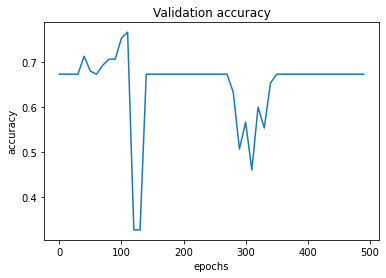

In [40]:
from sklearn.metrics import accuracy_score
from torch.utils.data import DataLoader

epochs = 500
accuracy=[]

for epoch in range(epochs):

    net.train()
    # send your training data to GPU device
    data = X_train_torch.to(device)
    label = y_train_torch.to(device)
    
    # 4.3.1: Complete the training loop
    outputs = net(data)
    loss = loss_fun(outputs, label)
    err = loss
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # validation: evaluate on test set every 10 iterations
    if epoch % 10==0:   
        net.eval()
        
        # 4.3.2: Calculate validation loss and accuracy (use test set)
        
        # send your validation data to GPU device
        data = X_test_torch.to(device)
        label = y_test_torch.to(device)
        
        # predict validation outputs
        outputs = net(data)
        
        # calculate validation error
        val_err = loss_fun(outputs, label)
        
        # calculate accuracy
        outputs_list = change_list2label(outputs)
        acc = accuracy_score(label.cpu(), outputs_list)
        accuracy.append(acc) 
        print(f'-----------Current Epoch is {epoch}-------------')
        # print out training and validation loss and validation accuracy
        print('Train loss : {:.4f}, Val Loss: {:.4f}, Val accuracy: {:.4f}'.format(err, val_err,accuracy[-1]))
# end of the training loop


# Print the highest validation accuracy that we achieved during training
print(['Best val error: ', np.max(accuracy)])



# 4.3.3: Plot the validation accuracy over iterations
plt.plot(np.arange(len(accuracy))*10, accuracy)

plt.title('Validation accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')

### Total for CW3: 90 marks
The final mark reported on KEATS will be converted to out of 100 

__IMPORTANT: Download your solved notebook from Colab and upload it on KEATS. Make sure that the output of the cells is visible after downloading, otherwise we will not be able to mark your work.__